In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('original_data.csv').drop(columns=['Unnamed: 0'])

In [3]:
df

,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [4]:
generalized_profession_to_area = {
    "Teacher": "Education",
    "Content Writer": "Writing",
    "HR Manager": "Human Resources",
    "Pharmacist": "Health",
    "Architect": "Construction",
    "Consultant": "Consulting",
    "Business Analyst": "Consulting",
    "Doctor": "Health",
    "Entrepreneur": "Business",
    "Chef": "Gastronomy",
    "Chemist": "Health",
    "Lawyer": "Law",
    "Travel Consultant": "Travel",
    "Researcher": "Scientist",
    "Educational Consultant": "Education",
    "Manager": "Business",
    "Data Scientist": "Technology",
    "Judge": "Law",
    "Customer Support": "Customer Service",
    "Marketing Manager": "Digital",
    "Pilot": "Travel",
    "Finanancial Analyst": "Finance",
    "Financial Analyst": "Finance",
    "Plumber": "General services",
    "Software Engineer": "Technology",
    "Electrician": "Engineer",
    "Sales Executive": "Finance",
    "Digital Marketer": "Technology",
    "Civil Engineer": "Engineer",
    "Mechanical Engineer": "Engineer",
    "UX/UI Designer": "Technology",
    "Graphic Designer": "Technology",
    "Accountant": "Finance",
    "Research Analyst": "Finance",
    "Investment Banker": "Finance"
}

# Atualizar a coluna 'area' com o mapeamento generalizado
df['area'] = df['profession'].map(generalized_profession_to_area)

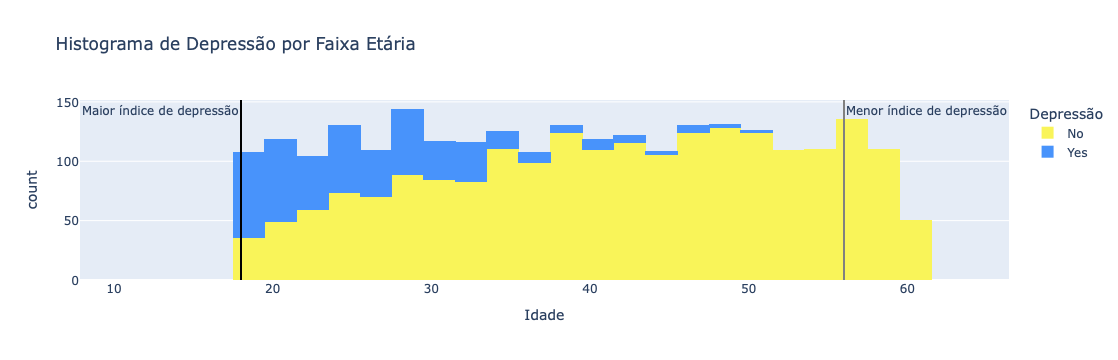

In [46]:
# Mapeamento de cores personalizado
mapa_cores = {"Yes": "#4893FB", "No": "#F9F459"}

# Encontrando as idades com maior frequência para cada grupo
idade_mais_frequente_sim = df[df['depression'] == "Yes"]['age'].value_counts().idxmax()
idade_mais_frequente_nao = df[df['depression'] == "No"]['age'].value_counts().idxmax()

# Criando o histograma
grafico = px.histogram(
    df,
    x="age",
    color="depression",
    color_discrete_map = mapa_cores, 
    nbins=40,
    title="Histograma de Depressão por Faixa Etária",
    labels={"age": "Idade", "depression": "Depressão"},
)

# Linhas verticais nos pontos chave
grafico.add_vline(
    x=idade_mais_frequente_sim, 
    line_color="black", 
    annotation_text="Maior índice de depressão", 
    annotation_position="top left"
)
grafico.add_vline(
    x=idade_mais_frequente_nao, 
    line_color="gray", 
    annotation_text="Menor índice de depressão", 
    annotation_position="top right"
)


In [6]:
# Contagem de casos de depressão por área
contagem_depressao = df.groupby(['area', 'depression']).size().reset_index(name='count')

# Calcular a proporção de "Yes" para depressão em cada área
proporcoes_depressao = contagem_depressao.pivot(index='area', columns='depression', values='count').fillna(0)
proporcoes_depressao['proportion_yes'] = proporcoes_depressao['Yes'] / (proporcoes_depressao['Yes'] + proporcoes_depressao['No'])

# Encontrar as áreas com maior e menor proporção de "Yes"
area_maior_proporcao = proporcoes_depressao['proportion_yes'].idxmax()
area_menor_proporcao = proporcoes_depressao['proportion_yes'].idxmin()

# Criar o gráfico de barras comparando "Yes" e "No" para depressão por área
grafico_barras = px.bar(
    contagem_depressao,
    x='area',
    y='count',
    color='depression',
    title='Análise Proporcional de Casos de Depressão por Área',
    labels={'area': 'Área de Atuação', 'count': 'Número de Casos', 'depression': 'Depressão'},
    barmode='group',
    color_discrete_map={"Yes": "#4893FB", "No": "#F9F459"}
)

# Adicionar anotações indicando as áreas com maior e menor proporção de "Yes"
grafico_barras.add_annotation(
    x=area_maior_proporcao,
    y=contagem_depressao[contagem_depressao['area'] == area_maior_proporcao]['count'].max(),
    text="Maior índice de depressão",
    showarrow=True,
    arrowhead=2,
    ax=-50, ay=-30, font=dict(color="black")
)

grafico_barras.add_annotation(
    x=area_menor_proporcao,
    y=contagem_depressao[contagem_depressao['area'] == area_menor_proporcao]['count'].max(),
    text="Menor índice de depressão",
    showarrow=True,
    arrowhead=2,
    ax=-50, ay=-30, font=dict(color="gray")
)

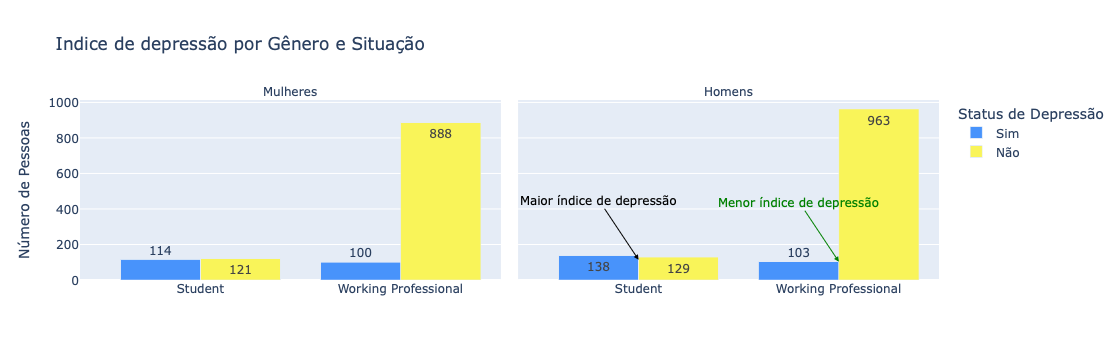

In [44]:
import plotly.express as px
import pandas as pd

# Exemplo de DataFrame
# df = pd.read_csv('seu_dataset.csv')

# Contagem total por gênero e categoria
contagem_total_genero_categoria = df.groupby(['gender', 'working_professional_or_student']).size().reset_index(name='total_count')

# Contagem de casos "Sim" para depressão por gênero e categoria
contagem_sim_genero_categoria = df[df['depression'] == "Yes"].groupby(['gender', 'working_professional_or_student']).size().reset_index(name='yes_count')

# Combinar os dados
dados_analise = contagem_total_genero_categoria.merge(contagem_sim_genero_categoria, on=['gender', 'working_professional_or_student'], how='left').fillna(0)

# Preparar os dados para o gráfico
dados_analise['no_count'] = dados_analise['total_count'] - dados_analise['yes_count']

# Atualizar os rótulos diretamente
dados_analise['gender'] = dados_analise['gender'].replace({'Female': 'Mulheres', 'Male': 'Homens'})

# Identificar os pontos de destaque
destacar_mulher = dados_analise[dados_analise['gender'] == 'Mulheres'].sort_values('yes_count', ascending=False).iloc[0]
destacar_homem = dados_analise[dados_analise['gender'] == 'Homens'].sort_values('yes_count', ascending=True).iloc[0]

# Criar o gráfico
grafico_total_sim = px.bar(
    dados_analise.melt(
        id_vars=['gender', 'working_professional_or_student'], 
        value_vars=['yes_count', 'no_count'], 
        var_name='Depressão', 
        value_name='count'
    ),
    x='working_professional_or_student',
    y='count',
    color='Depressão',
    barmode='group',
    facet_col='gender',
    text='count',
    title='Indice de depressão por Gênero e Situação',
    labels={
        'working_professional_or_student': '',
        'count': 'Número de Pessoas',
        'Depressão': 'Status de Depressão'
    },
    color_discrete_map={'yes_count': '#4893FB', 'no_count': '#F9F459'}
)

# Atualizar os nomes das facetas diretamente
grafico_total_sim.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Ajustar a legenda para exibir valores mais intuitivos
grafico_total_sim.for_each_trace(lambda t: t.update(name="Sim" if t.name == "yes_count" else "Não"))

# Adicionar destaque para as mulheres (maior índice de depressão)
grafico_total_sim.add_annotation(
    x=destacar_mulher['working_professional_or_student'],
    y=destacar_mulher['yes_count'],
    text="Maior índice de depressão",
    showarrow=True,
    arrowhead=2,
    ax=-40,  # Deslocamento horizontal
    ay=-60,  # Deslocamento vertical
    arrowcolor='black',
    font=dict(color='black', size=12),
    xref='x',
    yref='y',
    row=1,
    col=2
)


# Adicionar destaque para os homens (menor índice de depressão)
grafico_total_sim.add_annotation(
    x=destacar_homem['working_professional_or_student'],
    y=destacar_homem['yes_count'],
    text="Menor índice de depressão",
    showarrow=True,
    arrowhead=2,
    ax=-40,
    ay=-60,
    arrowcolor='green',
    font=dict(color='green', size=12),
    xref='x',
    yref='y',
    row=1,
    col=2
)

# Exibir o gráfico
grafico_total_sim.show()


Neste gráfico podemos ver o índice de depressão por genero e situação. Neste caso vimos que a mulher estudante tem o indice mais alto de depressão, enquanto o homem profissional tem o menor.